# `pyGIMLi(emg3d)`

Requires
- `pygimli>=1.5.2`
- `emg3d@inv-pygimli` (`pip install git+https://github.com/emsig/emg3d@inv-pygimli`

Quite simple plus all possible inv-crimes (same mesh, some solver, ...).

**Current Limitations**
- Only isotropic models supported
- Only 'Conductivity' models supported
- Without el. perm. and magn. perm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import emg3d
# import pygimli as pg
import emg3d.inversion.pygimli as ipygimli

%run ../data/sampledata

In [2]:
%matplotlib widget

## Load Simulation (incl. Survey, Models, Data)

In [3]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
sim, model = load_data("../data/pyGIMLi-Original")
model_init = sim.model.copy()

import os
sim.file_path = os.path.abspath('./data/')

# sim.tol_gradient = 1e-2  # could be reduced further to potentially speed-up more

Data loaded from «/palmyra/data/dieterwerthmul/devInv/data/pyGIMLi-Original.h5»
[emg3d v1.8.4.dev12+ge283125.d20240903 (format 1.0) on 2024-09-03T16:26:27.772941].


## Define regions, instantiate Kernel and Inversion

In [5]:
markers = np.zeros(sim.model.shape, dtype=int)
markers[:, :, sim.model.grid.cell_centers_z > 0] = 1

# Instantiate the emg3d-kernel for pyGIMLi
fop = ipygimli.Kernel(simulation=sim, markers=markers, pgthreads=1)

# Instantiate the inversion and set some inversion parameters
INV = ipygimli.Inversion(fop=fop)
INV.inv.setCGLSTolerance(10)  # is _absolute_, not _relative_
INV.inv.setMaxCGLSIter(30)

# Set the regions.
INV.fop.setRegionProperties(0, limits=(0.001, 2), startModel=1)
INV.fop.setRegionProperties(1, limits=(3, 4), startModel=3.33)

# INV.stopAtChi1 = False

In [6]:
# DIFFERENT # fop.obs_resp_errors[fop.obs_resp_errors > 0.5] = 1e8
INV.run(
    # dataVals=fop.obs_resp_data,  # DIFFERENT # 
    # relativeError=fop.obs_resp_errors,  # DIFFERENT # 
    maxIter=20, # just to test
    lam=1,
    #verbose=True,
    #startModel=...,
    #isReference=True,
)

05/09/24 - 11:19:21 - pyGIMLi - INFO - :: pyGIMLi(emg3d) START ::


05/09/24 - 11:19:21 - pyGIMLi - INFO - Created startmodel from region infos: 211296 [1.0,...,3.33]


05/09/24 - 11:20:06 - pyGIMLi - INFO - =======================================================================
                                        it        χ²   F(m)       λ         ϕᵈ         ϕᵐ   ϕ=ϕᵈ+λϕᵐ   Δϕ (%)
                                       -----------------------------------------------------------------------


05/09/24 - 11:20:06 - pyGIMLi - INFO -   0     118.1      1     1.0   499270.1        0.0   499270.1     0.00


05/09/24 - 12:23:23 - pyGIMLi - INFO -   1     114.4     65     1.0   483475.6      206.9   483682.4     3.12


05/09/24 - 13:28:02 - pyGIMLi - INFO -   2     109.6     65     1.0   463499.2     1027.2   464526.4     3.96


05/09/24 - 14:32:45 - pyGIMLi - INFO -   3      98.4     65     1.0   416086.3     3792.3   419878.6     9.61


05/09/24 - 15:37:43 - pyGIMLi - INFO -   4      77.4     65     1.0   327174.5     8469.2   335643.7    20.06


05/09/24 - 16:42:11 - pyGIMLi - INFO -   5      52.0     65     1.0   219871.7    13405.8   233277.5    30.50


05/09/24 - 17:46:20 - pyGIMLi - INFO -   6      35.6     65     1.0   150673.7    17880.0   168553.7    27.75


05/09/24 - 18:51:13 - pyGIMLi - INFO -   7      20.0     65     1.0    84750.7    23538.0   108288.7    35.75


05/09/24 - 19:57:25 - pyGIMLi - INFO -   8      11.4     65     1.0    48127.9    25331.6    73459.5    32.16


05/09/24 - 21:04:44 - pyGIMLi - INFO -   9       7.9     65     1.0    33609.1    23360.5    56969.6    22.45


05/09/24 - 22:13:00 - pyGIMLi - INFO -  10       7.7     65     1.0    32689.9    23185.9    55875.8     1.92


05/09/24 - 23:22:19 - pyGIMLi - INFO -  11       7.3     65     1.0    30736.1    22825.8    53561.9     4.14


06/09/24 - 00:31:24 - pyGIMLi - INFO -  12       5.2     65     1.0    22026.3    21798.3    43824.6    18.18


06/09/24 - 01:44:10 - pyGIMLi - INFO -  13       4.5     66     1.0    19131.8    20604.8    39736.6     9.33


06/09/24 - 02:55:16 - pyGIMLi - INFO -  14       4.2     65     1.0    17847.0    20186.6    38033.6     4.29


06/09/24 - 04:10:02 - pyGIMLi - INFO -  15       3.2     65     1.0    13404.5    18851.6    32256.1    15.19


06/09/24 - 05:28:28 - pyGIMLi - INFO -  16       2.9     66     1.0    12093.7    17610.2    29703.9     7.91


06/09/24 - 06:44:26 - pyGIMLi - INFO -  17       2.6     65     1.0    10797.2    16726.6    27523.8     7.34


06/09/24 - 07:56:35 - pyGIMLi - INFO -  18       2.4     66     1.0     9961.8    15753.1    25714.9     6.57


06/09/24 - 09:09:29 - pyGIMLi - INFO -  19       2.2     66     1.0     9287.4    14975.6    24263.0     5.65


06/09/24 - 10:19:56 - pyGIMLi - INFO -  20       2.0     66     1.0     8573.3    13980.5    22553.8     7.04


06/09/24 - 10:19:56 - pyGIMLi - INFO - :: pyGIMLi(emg3d) END   :: runtime = 23:00:35


## Plots

Depth slice: -1850.0 m


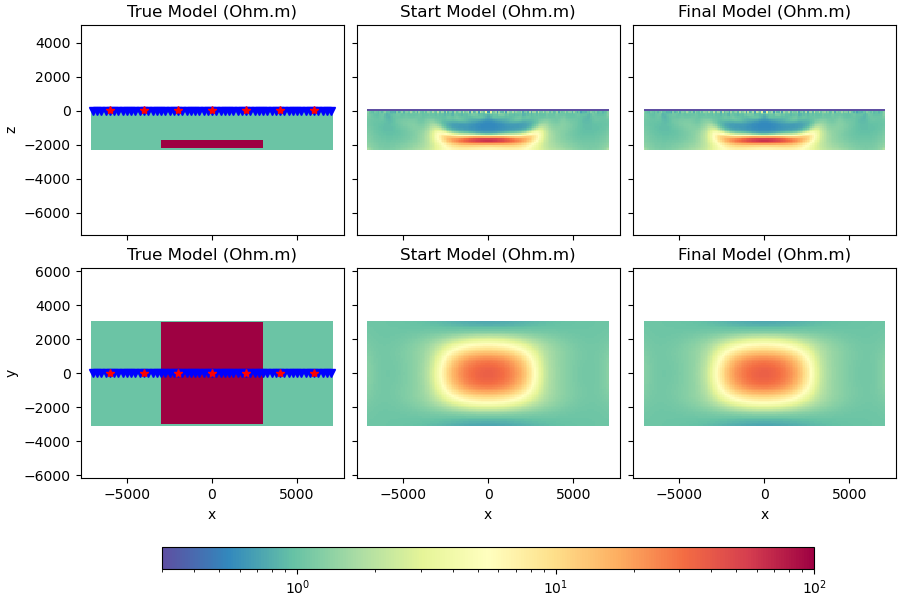

In [7]:
plot_models(sim, sim.model, model, zind=4, vmin=0.3, vmax=100)

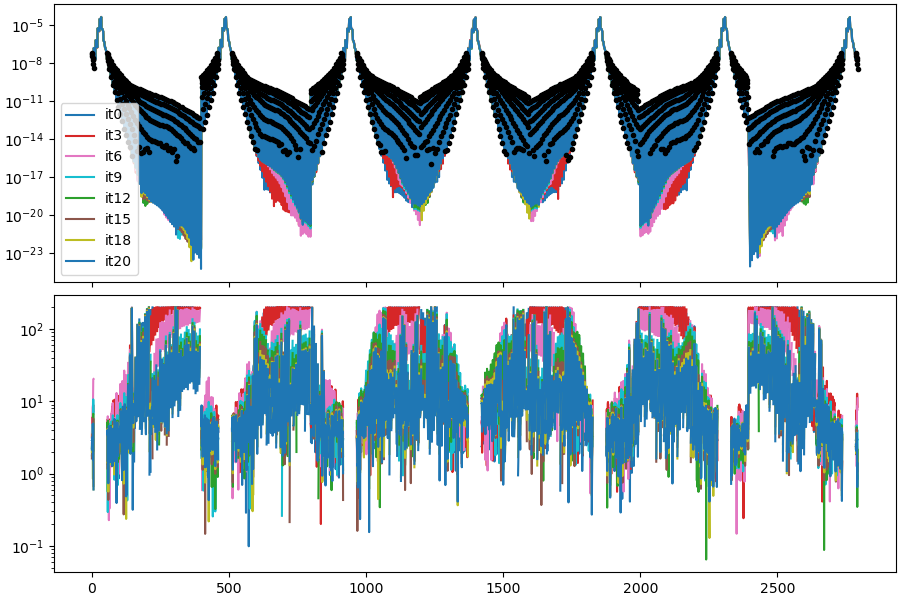

In [8]:
plot_responses(sim)

In [9]:
emg3d.Report()

--------------------------------------------------------------------------------
  Date: Fri Sep 06 10:19:58 2024 CEST

                OS : Linux (Red Hat Enterprise Linux 8.10)
            CPU(s) : 128
           Machine : x86_64
      Architecture : 64bit
               RAM : 1006.8 GiB
       Environment : Jupyter
       File system : ext4

  Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18)
  [GCC 12.3.0]

             numpy : 1.26.4
             scipy : 1.14.1
             numba : 0.59.1
             emg3d : 1.8.4.dev7+g62f32ae
           empymod : 2.3.1
            xarray : 2024.7.0
        discretize : 0.10.0
              h5py : 3.11.0
        matplotlib : 3.9.1
              tqdm : 4.66.5
           IPython : 8.27.0
           pygimli : 1.5.2
            pgcore : 1.5.0
--------------------------------------------------------------------------------